dataset src: https://www.kaggle.com/goyalshalini93/car-price-prediction-linear-regression-rfe

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [ ]:
df.head(7)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.0
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.0


In [ ]:
#to add headers
# headers=["symboling","prices"] - put names and
#df.columns = headers

In [ ]:
#to export the new changes made to a new csv file
#path = C://.../newcar.csv
#df.to_csv(path)

In [ ]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [ ]:
df.describe(include="all")

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,205.000000,205.000000,205.000000,205.000000,205,205,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,147,2,2,2,5,3,2,NaN,NaN,NaN,NaN,NaN,7,7,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota corona,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,185,168,115,96,120,202,NaN,NaN,NaN,NaN,NaN,148,159,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.000000,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,174.049268,65.907805,53.724878,2555.565854,NaN,NaN,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,12.337289,2.145204,2.443522,520.680204,NaN,NaN,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,47.800000,1488.000000,NaN,NaN,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.300000,64.100000,52.000000,2145.000000,NaN,NaN,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,65.500000,54.100000,2414.000000,NaN,NaN,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.100000,66.900000,55.500000,2935.000000,NaN,NaN,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

#Identify and handle missing values

Data preprocessing - process of converting or mapping data from one “raw” form into another format to make it ready for further analysis.

In [ ]:
#df1=df.replace('?',np.NaN)
#df=df1.dropna(subset=["price"], axis=0)
#df.head(20)

#Deal with missing data
How to deal with missing data?
Drop data
a. Drop the whole row
b. Drop the whole column
Replace data
a. Replace it by mean
b. Replace it by frequency
c. Replace it based on other functions

with the dropna method, you can choose to drop rows or columns that contain
missing values, like NaN.
So you’ll need to specify “axis=0” to drop the rows, or “axis=1” to drop the
columns that contain the missing values.

In [ ]:
#“Inplace=True” just writes the result back into the dataframe.
#“axis=0” to drop the rows, or “axis=1” to drop the columns that contain the missing values.
df.dropna(subset=["price"], axis=0)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


Where "column" is the name of the column, you can apply the method ".describe()" to get the statistics of those columns as follows:

dataframe[[' column 1 ',column 2', 'column 3'] ].describe()

Apply the method to ".describe()" to the columns 'length' and 'compression-ratio'.

The missing values are converted by default. We use the following functions to identify these missing values. There are two methods to detect missing data:

.isnull()
.notnull()

In [ ]:
df.isnull

<bound method DataFrame.isnull of      car_ID  symboling                   CarName  ... citympg highwaympg    price
0         1          3        alfa-romero giulia  ...      21         27  13495.0
1         2          3       alfa-romero stelvio  ...      21         27  16500.0
2         3          1  alfa-romero Quadrifoglio  ...      19         26  16500.0
3         4          2               audi 100 ls  ...      24         30  13950.0
4         5          2                audi 100ls  ...      18         22  17450.0
..      ...        ...                       ...  ...     ...        ...      ...
200     201         -1           volvo 145e (sw)  ...      23         28  16845.0
201     202         -1               volvo 144ea  ...      19         25  19045.0
202     203         -1               volvo 244dl  ...      18         23  21485.0
203     204         -1                 volvo 246  ...      26         27  22470.0
204     205         -1               volvo 264gl  ...      19   

Count missing values in each column
Using a for loop in Python, we can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value and "False" means the value is present in the dataset. In the body of the for loop the method ".value_counts()" counts the number of "True" values.

In [ ]:
missing_data = df.isnull()
missing_data.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


#Count missing values in each column

In [ ]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

car_ID
False    205
Name: car_ID, dtype: int64

symboling
False    205
Name: symboling, dtype: int64

CarName
False    205
Name: CarName, dtype: int64

fueltype
False    205
Name: fueltype, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

doornumber
False    205
Name: doornumber, dtype: int64

carbody
False    205
Name: carbody, dtype: int64

drivewheel
False    205
Name: drivewheel, dtype: int64

enginelocation
False    205
Name: enginelocation, dtype: int64

wheelbase
False    205
Name: wheelbase, dtype: int64

carlength
False    205
Name: carlength, dtype: int64

carwidth
False    205
Name: carwidth, dtype: int64

carheight
False    205
Name: carheight, dtype: int64

curbweight
False    205
Name: curbweight, dtype: int64

enginetype
False    205
Name: enginetype, dtype: int64

cylindernumber
False    205
Name: cylindernumber, dtype: int64

enginesize
False    205
Name: enginesize, dtype: int64

fuelsystem
False    205
Name: fuelsystem, dtype: int64

boreratio
Fa

**Calculate the mean value for the "normalized-losses" column**

avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

**Replace "NaN" with mean value in "normalized-losses" column**

df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

#Data Standardization

Standardization is the process of transforming data into a common format, allowing the researcher to make the meaningful comparison.

To transform mpg to L/100km we need to divide 235 by each value in the city-m per gallon column.

In [ ]:
df['citympg'] = 235/df['citympg']

In [ ]:
df.rename(columns={"citympg": "cityl/100km"}, inplace = True)

In the case of wrong datatypes, the method dataframe.astype() can be used to convert a datatype from one format to another.
For example, using astype(“int”) for the price column,
df['price'] = df['price'].astype(“int”)


In [ ]:
#To see which values are present in a particular column, we can use the ".value_counts()" method:

df['doornumber'].value_counts()
#use the ".idxmax()" method to calculate the most common type automatically:

four    115
two      90
Name: doornumber, dtype: int64

#DATA NORMALIZATION


to normalize these variables so that the range of the values is consistent.
 Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling the variable so the variable values range from 0 to 1.

*    simple feature scaling
*   min max method
*   z score method



In [ ]:
# replace (original value) by (original value)/(maximum value)
df['carlength'] = df['carlength']/df['carlength'].max()
df['carwidth'] = df['carwidth']/df['carwidth'].max()
df['carheight'] = df['carheight']/df['carheight'].max()

df[["carlength","carwidth","carheight"]].head()

,carlength,carwidth,carheight
0,0.811148,0.886584,0.816054
1,0.811148,0.886584,0.816054
2,0.822681,0.905947,0.876254
3,0.848630,0.915629,0.908027
4,0.848630,0.918396,0.908027


#BINNING

BINNING - Binning is when you group values together into bins.
 process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis
 For example, you can bin “age” into [0 to 5], [6 to 10], [11 to 15] and so on.
We can categorize them into 3 bins: low, medium, and high-priced cars.

Text(0.5, 1.0, 'horsepower bins')

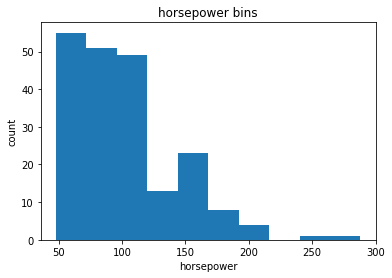

In [ ]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

We would like 3 bins of equal size bandwidth so we use numpy's linspace(start_value, end_value, numbers_generated function.

Since we want to include the minimum value of horsepower, we want to set start_value = min(df["horsepower"]).

Since we want to include the maximum value of horsepower, we want to set end_value = max(df["horsepower"]).

Since we are building 3 bins of equal length, there should be 4 dividers, so numbers_generated = 4.

We build a bin array with a minimum value to a maximum value by using the bandwidth calculated above. The values will determine when one bin ends and another begins.

In [ ]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48., 128., 208., 288.])

In [ ]:
group_names = ['Low', 'Medium', 'High']

In [ ]:
#We apply the function "cut" to determine what each value of `df['horsepower']` belongs to.

df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,160,Medium


In [ ]:
#no of cars in each bin
df["horsepower-binned"].value_counts()

Low       163
Medium     40
High        2
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

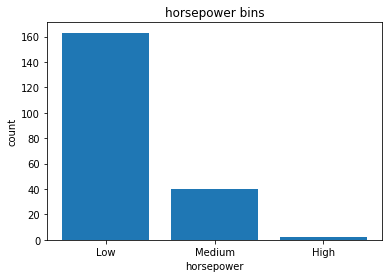

In [ ]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Text(0.5, 1.0, 'horsepower bins')

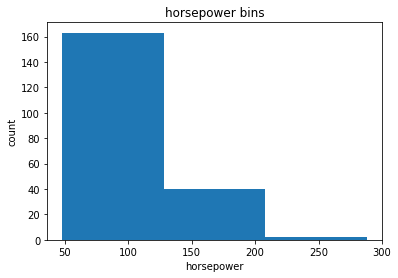

In [ ]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot


# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

#Indicator Variable (or Dummy Variable)
An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning.

 We see the column "fuel-type" has two unique values: "gas" or "diesel". To use this attribute in regression analysis, we convert "fuel-type" to indicator variables.

In [ ]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'cityl/100km',
       'highwaympg', 'price', 'horsepower-binned'],
      dtype='object')

In [ ]:
df['fueltype'].value_counts()


gas       185
diesel     20
Name: fueltype, dtype: int64

In [ ]:
dummy_variable_1 = pd.get_dummies(df["fueltype"])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [ ]:
dummy_variable_1.rename(columns={'gas':'fueltype-gas', 'diesel':'fueltype-diesel'}, inplace=True)
dummy_variable_1.head()

,fueltype-diesel,fueltype-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [ ]:
# merge data frame "df" and "dummy_variable_1"
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fueltype", axis = 1, inplace=True)

In [ ]:
df.head()

,car_ID,symboling,CarName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,cityl/100km,highwaympg,price,horsepower-binned,fueltype-diesel,fueltype-gas
0,1,3,alfa-romero giulia,std,two,convertible,rwd,front,88.6,0.811148,0.886584,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,11.190476,27,13495.0,Low,0,1
1,2,3,alfa-romero stelvio,std,two,convertible,rwd,front,88.6,0.811148,0.886584,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,11.190476,27,16500.0,Low,0,1
2,3,1,alfa-romero Quadrifoglio,std,two,hatchback,rwd,front,94.5,0.822681,0.905947,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,12.368421,26,16500.0,Medium,0,1
3,4,2,audi 100 ls,std,four,sedan,fwd,front,99.8,0.848630,0.915629,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,9.791667,30,13950.0,Low,0,1
4,5,2,audi 100ls,std,four,sedan,4wd,front,99.4,0.848630,0.918396,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,13.055556,22,17450.0,Low,0,1


In [ ]:
#to save in new file as cleaned data
# df.to_csv('clean_df.csv')

#Analyzing Individual Feature Patterns Using Visualization

In [ ]:
#we can calculate the correlation between variables  of type "int64" or "float64" using the method "corr"
#to find the correlation between the following columns: bore, stroke, compression-ratio, and horsepower.
df[['boreratio','stroke','compressionratio','horsepower']].corr()

,boreratio,stroke,compressionratio,horsepower
boreratio,1.000000,-0.055909,0.005197,0.573677
stroke,-0.055909,1.000000,0.186110,0.080940
compressionratio,0.005197,0.186110,1.000000,-0.204326
horsepower,0.573677,0.080940,-0.204326,1.000000


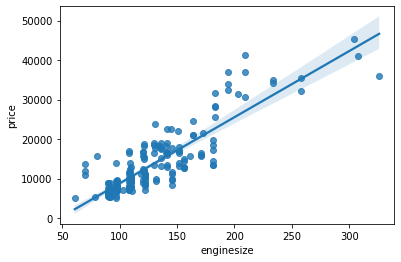

In [ ]:
# "regplot" which plots the scatterplot plus the fitted regression line for the data.
#Engine size as potential predictor variable of price

sns.regplot(x="enginesize", y="price", data=df)
#plt.ylim(0,)

In [ ]:
#As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables.
#Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.
#We can examine the correlation between 'engine-size' and 'price' and see that it's approximately 0.87.

df[["enginesize", "price"]].corr()

,enginesize,price
enginesize,1.000000,0.874145
price,0.874145,1.000000


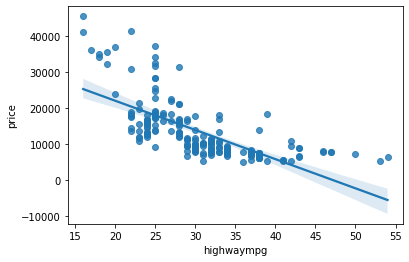

In [ ]:
sns.regplot(x="highwaympg", y="price", data=df)

# negative relationship. so could be potential predictor for price

In [ ]:
df[['highwaympg', 'price']].corr()

,highwaympg,price
highwaympg,1.000000,-0.697599
price,-0.697599,1.000000


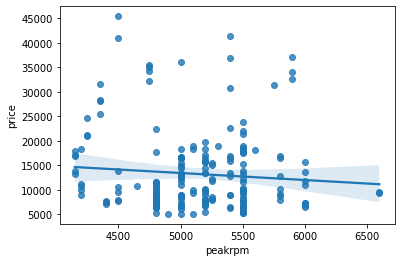

In [ ]:
sns.regplot(x="peakrpm", y="price", data=df)
#weak correlation - not a reliable variable

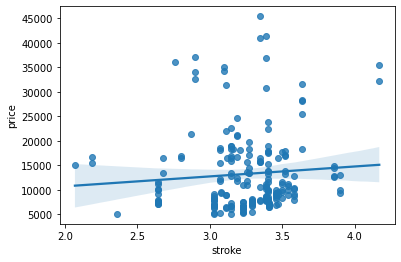

In [ ]:
sns.regplot(x="stroke", y="price", data=df)
#0.0823 corr - weak

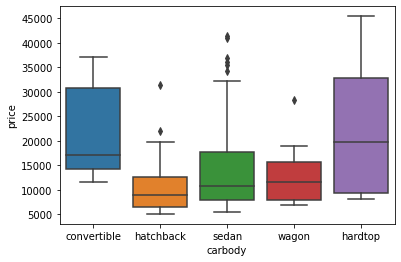

In [ ]:
#visualize categorical variables is by using boxplots.
sns.boxplot(x="carbody", y="price", data=df)

We see that the distributions of price between the different body-style categories have a significant overlap, so body-style would not be a good predictor of price. Let's examine engine "engine-location" and "price":

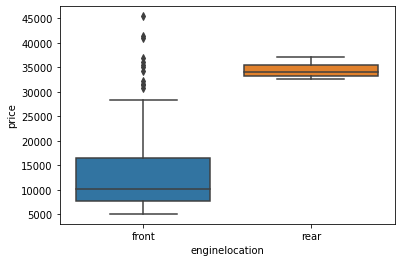

In [ ]:
sns.boxplot(x="enginelocation", y="price", data=df)

 the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.

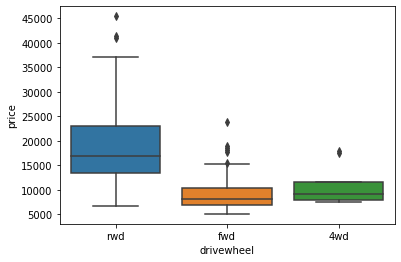

In [ ]:
# drive-wheels
sns.boxplot(x="drivewheel", y="price", data=df)

#distribution of price between the different drive-wheels categories differs. As such, drive-wheels could potentially be a predictor of price.

#Descriptive Statistical Analysis

In [ ]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,cityl/100km,highwaympg,price,fueltype-diesel,fueltype-gas
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,0.836373,0.911588,0.898409,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,9.949525,30.751220,13276.710571,0.097561,0.902439
std,59.322565,1.245307,6.021776,0.059285,0.029671,0.040862,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,2.573104,6.886443,7988.852332,0.297446,0.297446
min,1.000000,-2.000000,86.600000,0.678039,0.834025,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,4.795918,16.000000,5118.000000,0.000000,0.000000
25%,52.000000,0.000000,94.500000,0.799135,0.886584,0.869565,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,7.833333,25.000000,7788.000000,0.000000,1.000000
50%,103.000000,1.000000,97.000000,0.832292,0.905947,0.904682,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,9.791667,30.000000,10295.000000,0.000000,1.000000
75%,154.000000,2.000000,102.400000,0.879865,0.925311,0.928094,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,12.368421,34.000000,16503.000000,0.000000,1.000000
max,205.000000,3.000000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,18.076923,54.000000,45400.000000,1.000000,1.000000


In [ ]:
#The default setting of "describe" skips variables of type object.
#We can apply the method "describe" on the variables of type 'object' as follows

df.describe(include=['object'])

,CarName,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205
unique,147,2,2,5,3,2,7,7,8
top,toyota corona,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,168,115,96,120,202,148,159,94


#Value counts
 is a good way of understanding how many units of each characteristic/variable we have. We can apply the "value_counts" method on the column "drive-wheels". Don’t forget the method "value_counts" only works on pandas series, not pandas dataframes. As a result, we only include one bracket df['drive-wheels'], not two brackets df[['drive-wheels']].

In [ ]:
df['drivewheel'].value_counts().to_frame()

,drivewheel
fwd,120
rwd,76
4wd,9


In [ ]:
df['enginelocation'].value_counts().to_frame()

#This is because we only have three cars with a rear engine and 198 with an engine in the front, so this result is skewed.
#Thus, we are not able to draw any conclusions about the engine location - not a good predictor

,enginelocation
front,202
rear,3


#Grouping
The "groupby" method groups data by different categories. The data is grouped based on one or several variables, and analysis is performed on the individual groups.

For example, let's group by the variable "drive-wheels". We see that there are 3 different categories of drive wheels.

In [ ]:
df['drivewheel'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

If we want to know, on average, which type of drive wheel is most valuable, we can group "drive-wheels" and then average them.

We can select the columns 'drive-wheels', 'body-style' and 'price', then assign it to the variable "df_group_one".

In [ ]:
df_group_one = df[['drivewheel','carbody','price']]

In [ ]:
# grouping results
df_group_one = df_group_one.groupby(['drivewheel'],as_index=False).mean()
df_group_one

,drivewheel,price
0,4wd,11087.463000
1,fwd,9239.308333
2,rwd,19910.809211


From our data, it seems rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are approximately the same in price.

In [ ]:
#grouping  - find price based on body
df_gptest2 = df[['carbody','price']]
grouped_test_bodystyle = df_gptest2.groupby(['carbody'],as_index= False).mean()
grouped_test_bodystyle

,carbody,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,10376.652386
3,sedan,14344.270833
4,wagon,12371.960000


In [ ]:
#let's group by both 'drive-wheels' and 'body-style'.
#This groups the dataframe by the unique combination of 'drive-wheels' and 'body-style'. We can store the results in the variable 'grouped_test1'.

df_gptest = df[['drivewheel','carbody','price']]
grouped_test1 = df_gptest.groupby(['drivewheel','carbody'],as_index=False).mean()
grouped_test1

,drivewheel,carbody,price
0,4wd,hatchback,12731.083500
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9780.385965
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


A **pivot table** is like an Excel spreadsheet, with one variable along the column and another along the row. We can convert the dataframe to a pivot table using the method "pivot" to create a pivot table from the groups.

In this case, we will leave the drive-wheels variable as the rows of the table, and pivot body-style to become the columns of the table:

In [ ]:
grouped_pivot = grouped_test1.pivot(index='drivewheel',columns='carbody')
grouped_pivot

price                                                        
carbody    convertible       hardtop     hatchback         sedan         wagon
drivewheel                                                                    
4wd                NaN           NaN  12731.083500  12647.333333   9095.750000
fwd            11595.0   8249.000000   8396.387755   9780.385965   9997.333333
rwd            23949.6  24202.714286  15235.815789  21711.833333  16994.222222

In [ ]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                                        
carbody    convertible       hardtop     hatchback         sedan         wagon
drivewheel                                                                    
4wd                0.0      0.000000  12731.083500  12647.333333   9095.750000
fwd            11595.0   8249.000000   8396.387755   9780.385965   9997.333333
rwd            23949.6  24202.714286  15235.815789  21711.833333  16994.222222

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

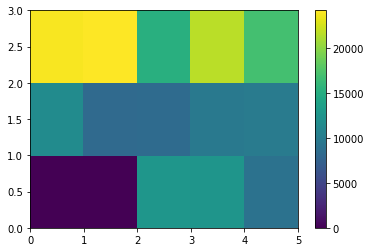

In [ ]:
#Drive Wheels and Body Style vs. Price

plt.pcolor(grouped_pivot)
plt.colorbar()
plt.show()

The heatmap plots the target variable (price) proportional to colour with respect to the variables 'drive-wheel' and 'body-style' on the vertical and horizontal axis, respectively. This allows us to visualize how the price is related to 'drive-wheel' and 'body-style'.

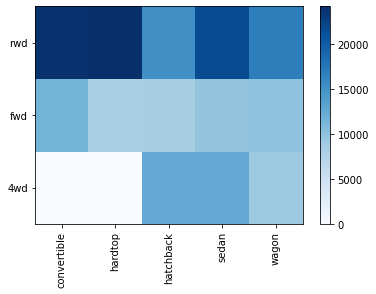

In [ ]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='Blues')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

#to get a better measure of the important characteristics, we look at the correlation of these variables with the car price.
#In other words: how is the car price dependent on this variable?

#Correlation and Causation
Correlation: a measure of the extent of interdependence between variables.
Causation: the relationship between cause and effect between two variables

The Pearson Correlation measures the linear dependence between two variables X and Y.

*   1: Perfect positive linear correlation.
*   0: No linear correlation, the two variables most likely do not affect each other.
*  -1: Perfect negative linear correlation.

We can say that there is a strong correlation when the correlation coefficient is close to 1 or -1 and the p-value is less than 0.001.




In [ ]:
df.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,cityl/100km,highwaympg,price,fueltype-diesel,fueltype-gas
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,-0.092012,0.011255,-0.109093,0.125568,-0.125568
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,0.063165,0.034606,-0.079978,-0.194311,0.194311
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,0.474040,-0.544082,0.577816,0.308346,-0.308346
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,0.659165,-0.704662,0.682920,0.212679,-0.212679
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,0.682850,-0.677218,0.759325,0.233880,-0.233880
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.002333,-0.107358,0.119336,0.284631,-0.284631
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,0.791911,-0.797465,0.835305,0.217275,-0.217275
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,0.744952,-0.677470,0.874145,0.069594,-0.069594
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,0.555989,-0.587012,0.553173,0.054451,-0.054451
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,0.042508,-0.043931,0.079443,0.241829,-0.241829


-------------------------------------------------

#P-value
 The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.

By convention, when the

p-value is  <  0.001: we say there is strong evidence that the correlation is significant.
the p-value is  <  0.05: there is moderate evidence that the correlation is significant.
the p-value is  <  0.1: there is weak evidence that the correlation is significant.
the p-value is  >  0.1: there is no evidence that the correlation is significant.

In [ ]:
from scipy import stats

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['wheelbase'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, "\n  P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.5778155982921501 
  P-value of P = 1.1828204863377837e-19


Since the p-value is  <  0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585).

In [ ]:
#horsepower and price
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is 0.8081388225362216  with a P-value of P =  1.4834365732941758e-48


Since the p-value is  <  0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1).

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['carwidth'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value )

#Since the p-value is < 0.001, the correlation between width and price is statistically significant,
#and the linear relationship is quite strong (~0.759)

The Pearson Correlation Coefficient is 0.7593252997415114  with a P-value of P = 9.627437876120389e-40


In [ ]:
pearson_coef, p_value = stats.pearsonr(df['enginesize'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

#Since the p-value is  <  0.001, the correlation between engine-size and price is statistically significant,
#and the linear relationship is very strong (~0.874).

The Pearson Correlation Coefficient is 0.8741448025245117  with a P-value of P = 1.3547637598648421e-65


In [ ]:
pearson_coef, p_value = stats.pearsonr(df['highwaympg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value )

#Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant,
#and the coefficient of about -0.69 shows that the relationship is negative and moderately strong.

The Pearson Correlation Coefficient is -0.6975990916465562  with a P-value of P =  3.2306813803649225e-31


#ANOVA
The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:

F-test score: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.

P-value: P-value tells how statistically significant our calculated score value is.




we can say that there is a strong correlation between a categorical variable
and other variables, if the ANOVA test gives us a ***large F-test value and a small p-value***


Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand.

To see if different types of 'drive-wheels' impact 'price', we group the data.

In [ ]:
grouped_test2=df_gptest[['drivewheel', 'price']].groupby(['drivewheel'])
grouped_test2.head(2)

,drivewheel,price
0,rwd,13495.000
1,rwd,16500.000
3,fwd,13950.000
4,4wd,17450.000
5,fwd,15250.000
9,4wd,17859.167


In [ ]:
df_gptest

,drivewheel,carbody,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
200,rwd,sedan,16845.0
201,rwd,sedan,19045.0
202,rwd,sedan,21485.0
203,rwd,sedan,22470.0


In [ ]:
grouped_test2.get_group('4wd')['price']

4      17450.000
9      17859.167
140     7603.000
144     9233.000
145    11259.000
148     8013.000
149    11694.000
154     7898.000
155     8778.000
Name: price, dtype: float64

In [ ]:
# ANOVA
#f_oneway' in the module 'stats' to obtain the F-test score and P-value
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])

print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 70.3205526496926 , P = 6.632887281209634e-24


This is a great result with a large F-test score showing a strong correlation and a P-value of almost 0 implying almost certain statistical significance. But does this mean all three tested groups are all this highly correlated?

In [ ]:
#fwd and rwd
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])

print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 136.18910682986836 , P = 3.495183646622854e-24


In [ ]:
#4wd and rwd

f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])

print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 8.168577961997418 , P = 0.005386865765311276


In [ ]:
#4wd and fwd

f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])

print("ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 2.5267678953027906 , P = 0.1144156375817132


#Conclusion: Important Variables
We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:

Continuous numerical variables:

Length
Width
Curb-weight
Engine-size
Horsepower
City-mpg
Highway-mpg
Wheel-base
Bore

Categorical variables: Drive-wheels

As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.

#LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()
lm

LinearRegression()

In [ ]:
X = df[['highwaympg']]
Y = df['price']

In [ ]:
lm.fit(X,Y)

LinearRegression()

In [ ]:
Yhat=lm.predict(X)
Yhat[0:5]

array([16312.47322074, 16312.47322074, 17121.74674903, 13884.65263588,
       20358.84086218])

In [ ]:
lm.intercept_


38162.85848448241

In [ ]:
lm.coef_

array([-809.27352829])

final linear model
𝑌ℎ𝑎𝑡=𝑎+𝑏𝑋

Plugging in the actual values we get:

Price = 38162.85 - 809.273 x highway-mpg

In [ ]:
lm1 =LinearRegression()
lm1

LinearRegression()

In [ ]:
lm1.fit(df[['enginesize']], df[['price']])
lm1

LinearRegression()

In [ ]:
lm1.coef_

array([[167.69841639]])

In [ ]:
lm1.intercept_

array([-8005.44553115])